1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


def mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def fit_linear_regression_gd(X, y, alpha=0.001, iters=500, epsilon=1e-4, L1=0, L2=0):
    w = np.random.randn(X.shape[1] + 1)
    X_with_ones = np.column_stack(([1 for i in range(X.shape[0])], X))
    err = [np.inf, mse(y, np.dot(w, X_with_ones.T))]
    for i in range(iters):
        if  abs(err[-2] - err[-1]) < epsilon:
            break
        count = i + 1
        if L1:
            l1 = L1 * np.sign(w)
        else:
            l1 = 0
        if L2:
            l2 = L2 * w
        else:
            l2 = 0
        w -=  (alpha/X_with_ones.shape[1] * np.dot(X_with_ones.T, (np.dot(X_with_ones, w) - y))
            - l2 - l1)
        err.append(mse(y, np.dot(w, X_with_ones.T)))
    return w, count, err


def fit_linear_regression_sgd(X, y, alpha=0.001, iters=500, epsilon=1e-4, iter_weight=0, L1=0, L2=0):
    w = np.random.randn(X.shape[1] + 1)
    l1 = L1
    l2 = L2 
    X_with_ones = np.column_stack(([1 for i in range(X.shape[0])], X))
    err = [np.inf, mse(y, np.dot(w, X_with_ones.T))]
    for i in range(iters):
        if  abs(err[-2] - err[-1]) < epsilon:
            break
        count = i + 1
        rand_row_ind = np.random.randint(X_with_ones.shape[0])
        if L1:
            l1 = L1 * np.sign(w)
        else:
            l1 = 0
        if L2:
            l2 = L2 * w
        else:
            l2 = 0
        w -=  (alpha/X_with_ones.shape[1] * np.dot(X_with_ones[rand_row_ind].T, (np.dot(X_with_ones[rand_row_ind], w)- y[rand_row_ind])) 
            - l1 - l2)
        if  iter_weight == 0:
            err.append(mse(y, np.dot(w, X_with_ones.T)))
        elif i % X.shape[0] == 0:
            err.append(mse(y, np.dot(w, X_with_ones.T)))
    return w, count, err


def fit_linear_regression_mbgd(X, y, alpha=0.001, iters=500, epsilon=1e-4, qty_in_batch=1):
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    w = np.random.randn(X.shape[1] + 1)
    X_with_ones = np.column_stack(([1 for i in range(X.shape[0])], X))
    err = [np.inf, mse(y, np.dot(w, X_with_ones.T))]
    for i in range(1, iters + 1):
        if  abs(err[-2] - err[-1]) < epsilon:
            break
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b+1)
            X__with_ones_tmp = X_with_ones[start_ : end_, : ]
            y_tmp = y[start_ : end_]
            count = i
            w -=  alpha/X_with_ones.shape[1] * np.dot(X__with_ones_tmp.T, (np.dot(X__with_ones_tmp, w) - y_tmp))
        err.append(mse(y, np.dot(w, X_with_ones.T)))
    return w, count, err


In [5]:
X, y, coef = make_regression(n_samples=20, n_features=3, coef=True, random_state=404, noise=5)
X.shape, y.shape

((20, 3), (20,))

In [6]:
# y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60], dtype='float64')
# X = np.array([[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]], dtype='float64').T
alpha = 0.001
epsilon = 0.0000001
iters = 2000

    

In [7]:
gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters)
gd[0], gd[1]

(array([-3.54603827, 97.71293046, 78.08795172, 22.07083702]), 2000)

In [8]:
# mbgd = fit_linear_regression_mbgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters, qty_in_batch=1)
# mbgd[0], mbgd[1]

In [9]:
sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0])
sgd[0], sgd[1]

(array([-3.15864306, 97.31913999, 77.76691337, 22.01970191]), 31127)

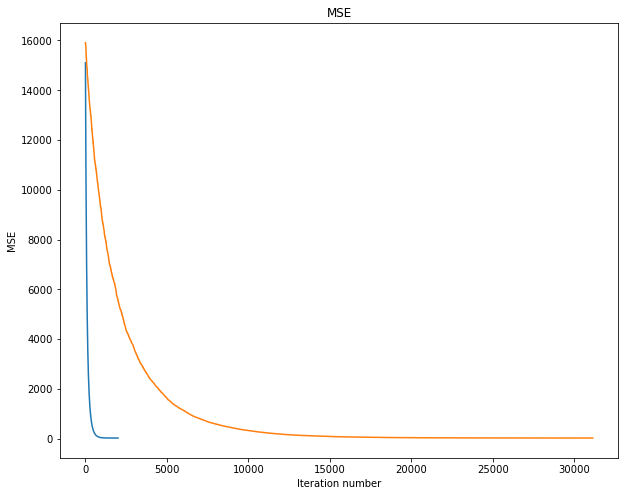

In [10]:
fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])


In [11]:
gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters)

sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0], iter_weight=1)


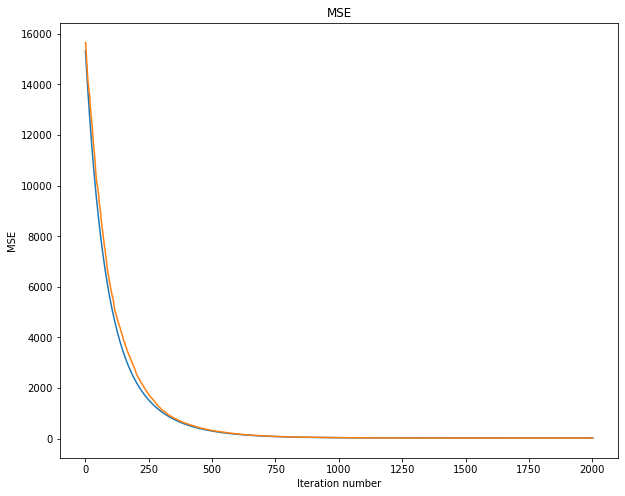

In [12]:
fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])

Стахостический градиентный спуск сходится медленней, за большее количесвто итераций, но если ошибку в стахастическом спуске считать каждые ```X.shape[0]``` то градиентный спуск и стахастический градиентный спуск выглядят практически идентично.

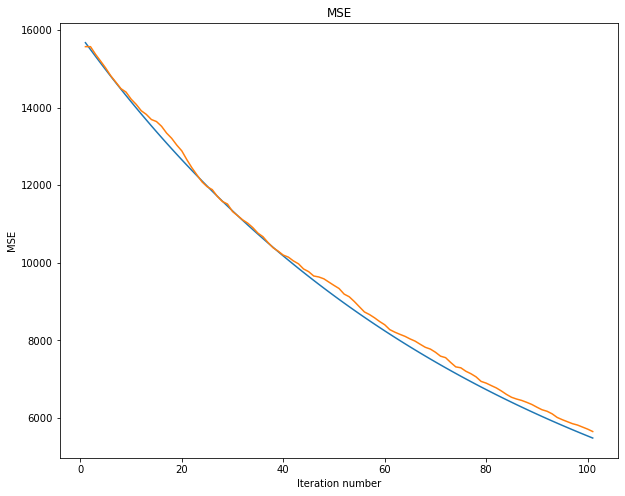

In [13]:
iters= 100

gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters)

sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0], iter_weight=1)

fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])

Если посмотреть на меньшем масштабе, то хорошо заметно биение стахастического градиентного спуска. Мне не удалось подобрать даные при которых 

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

3. (опция). Модернизировать решение задания 2, заменив L2 регуляризацию на L1

In [14]:
iters = 1000
gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters, L2 =0.000001)

sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0], iter_weight=1, L2= 0.0000001)

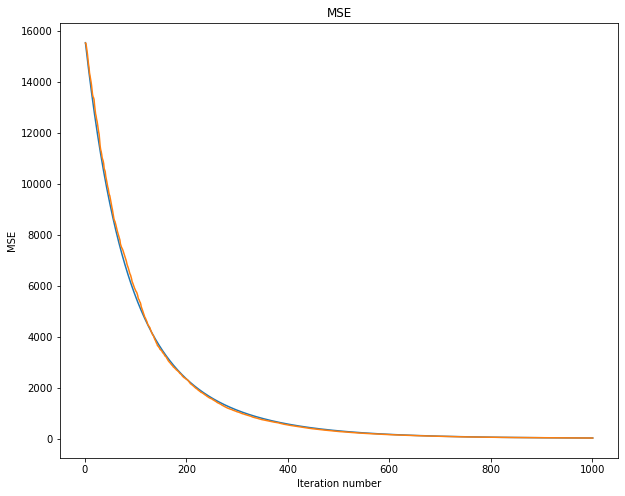

In [15]:
fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])

In [16]:
iters = 1000
gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters, L1 =0.0001)

sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0], iter_weight=1, L1= 0.00001)

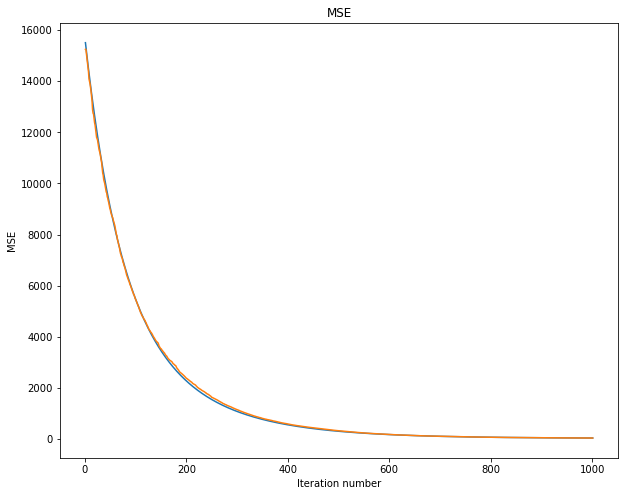

In [17]:
fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])

В SGD нужно выбирать параметр регуляризации меньше чем в GD так как он добавляется чаще, скорей всего разница между ними должна быть пропорциональна количеству данных имеющихся у нас.

In [18]:
iters = 1000
gd = fit_linear_regression_gd(X, y, alpha=alpha, epsilon=epsilon, iters=iters, L2 =0.000001)

sgd = fit_linear_regression_sgd(X, y, alpha=alpha, epsilon=epsilon, iters=iters*X.shape[0], iter_weight=1, L2= 0.000001)

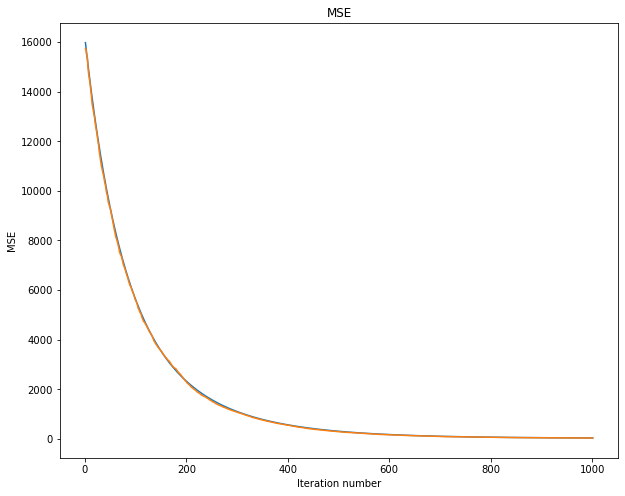

In [19]:
fig = plt.figure(figsize=(10,8))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
# plt.plot(range(len(mbgd[2])), mbgd[2])
plt.plot(range(len(gd[2])), gd[2])
plt.plot(range(len(sgd[2])), sgd[2])

Если сделать их оиднаковыми то GD все еще сходится, а SGD начинает расходиться.